# Data Science Boot Camp Project 1

## (1) Reading Input Data from Files

In [43]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.options.display.max_columns = 100
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 100

In [7]:
#imports
import os
import json
import pyprind

#defining function load_mojo_data
#which will read all data files and return list of dictionaries
#each dictionary = info for one movie
def load_mojo_data(baseDirectory = "C:\Work\Training\DSBootCamp\Git\ct16_cap1_ds5\project_1"):
    """
       Output: List of Dictionary of Movie
    """
    try:
        import numpy as np
        print "Start Loading MOJO DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'boxofficemojo')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        MovieInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                movie = json.load(target_file)


                if type(movie) is not dict:
                    continue
                columnNames = ["alt_title", "director", "domestic_gross", "mojo_slug", "opening_per_theater", \
                               "opening_weekend_take", "production_budget", "release_date_limited", \
                               "release_date_wide", "title", "widest_release", "worldwide_gross", "year"]
                for columnName in columnNames:
                    if columnName not in movie:
                        movie[columnName] = np.nan

                MovieInfoList.append(movie)
            bar.update(item_id = i)
        print "Finish Loading MOJO DATA:"
        return MovieInfoList
    except Exception as ex:
        print "Error loading MOJO data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

In [8]:
#imports
import os
import json
import pyprind

def load_critic_data(baseDirectory = "C:\Work\Training\DSBootCamp\Git\ct16_cap1_ds5\project_1"):
    """
       Output: List of Dictionary of Movie
    """
    import numpy as np
    import pyprind
    try:
        print "Start Loading CRITIC DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'metacritic')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        CriticInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                critic = json.load(target_file)
                if type(critic) is not dict:
                    continue
                columnNames = ["complete", "director", "genre", "metacritic_page", "metascore", \
                               "num_critic_reviews", "num_user_ratings", "num_user_reviews", \
                               "rating", "release_date", "runtime_minutes", "studio", \
                               "title", "user_score", "year"]
                for columnName in columnNames:
                    if columnName not in critic:
                        critic[columnName] = np.nan
                CriticInfoList.append(critic)
            bar.update(item_id = i)
        print "Finish Loading CRITIC DATA:"
        return CriticInfoList
    except Exception as ex:
        print "Error loading CRITIC data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

### (1.2) Reading in Movie Data

In [9]:
movie_dicts = load_mojo_data()
movie_df_raw = pd.DataFrame(movie_dicts)

print movie_df_raw.head(5)
print movie_df_raw.shape

0%                          100%
[XXX                           ]

Start Loading MOJO DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX] | ETA[sec]: 0.000 | Item ID: 3728
Total time elapsed: 1.642 sec


Finish Loading MOJO DATA:
                           alt_title         director  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None    

### (1.3) Checking Missing Values in Movie Data

In [10]:
print movie_df_raw.shape
print movie_df_raw.isnull().sum()

(3728, 13)
alt_title                  0
director                1556
domestic_gross            75
mojo_slug                  0
opening_per_theater      180
opening_weekend_take     180
production_budget       2137
release_date_limited    3435
release_date_wide         10
title                      0
widest_release           152
worldwide_gross          907
year                       7
dtype: int64


### (1.4) Reading in Critic Data

In [11]:
critic_dicts = load_critic_data()
critic_df_raw = pd.DataFrame(critic_dicts)

print critic_df_raw.head(5)
print critic_df_raw.shape

0%                          100%
[X                             ] | ETA[sec]: 4.550 | Item ID: 159

Start Loading CRITIC DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXX ] | ETA[sec]: 0.429 | Item ID: 4610

Finish Loading CRITIC DATA:
  complete         director                        genre  \
0     True       Gil Junger            [Comedy, Romance]   
1     True     Jamie Linden     [Drama, Comedy, Romance]   
2     True  Roland Emmerich  [Adventure, Drama, Fantasy]   
3     True    Stephen Herek  [Adventure, Comedy, Family]   
4     True       Kevin Lima             [Comedy, Family]   

                     metacritic_page  metascore num_critic_reviews  \
0  /movie/10-things-i-hate-about-you       70.0     [18, 7, 1, 26]   
1                    /movie/10-years       61.0     [7, 11, 0, 18]   
2                    /movie/10000-bc       34.0     [4, 8, 17, 29]   
3              /movie/101-dalmatians       49.0      [8, 9, 3, 20]   
4              /movie/102-dalmatians       35.0     [7, 5, 12, 24]   

   num_user_ratings   num_user_reviews rating release_date  runtime_minutes  \
0             175.0     [27, 1, 1, 29]  PG-13   1999-03-31             97.0   
1              12.0       [3, 2,

### (1.5) Checking Missing Value in Critic Data

In [12]:
print critic_df_raw.shape
print critic_df_raw.isnull().sum()

(4765, 16)
complete                 2
director                 2
genre                    2
metacritic_page          2
metascore              177
num_critic_reviews       2
num_user_ratings       284
num_user_reviews         2
rating                   2
release_date             2
runtime_minutes         97
studio                  40
title                    2
unable to retrieve    4763
user_score               2
year                     2
dtype: int64


### (1.6) Clean up Title Information to both data Set
####      -  Removing white spaces
####      -  Converting to lower case

In [13]:
movie_df_raw['scrubbed_title'] = movie_df_raw['title']
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.replace('[^\w]','')
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.lower()

critic_df_raw['scrubbed_title'] = critic_df_raw['title']
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.replace('[^\w]','')
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.lower()

### (1.7) Joining movie and critic data sets into rawData set using year and clean_title

In [14]:
rawDataDF = movie_df_raw.merge(critic_df_raw, how = 'inner', on = ["year", "scrubbed_title"])

In [15]:
print rawDataDF.head(5)

                           alt_title       director_x  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None        2008-03-07   
1       

### (1.8) Checking Missing Value information in raw Data

In [16]:
print rawDataDF.shape

print rawDataDF.isnull().sum()

(3347, 29)
alt_title                  0
director_x              1321
domestic_gross            42
mojo_slug                  0
opening_per_theater      105
opening_weekend_take     105
production_budget       1840
release_date_limited    3073
release_date_wide          3
title_x                    0
widest_release            80
worldwide_gross          720
year                       0
scrubbed_title             0
complete                   0
director_y                 0
genre                      0
metacritic_page            0
metascore                 76
num_critic_reviews         0
num_user_ratings         141
num_user_reviews           0
rating                     0
release_date               0
runtime_minutes           53
studio                    18
title_y                    0
unable to retrieve      3347
user_score                 0
dtype: int64


### Saving Raw Data into CSV file using utf-8 encoding

In [17]:
colList = [col for col in rawDataDF.columns if col not in ["alt_title", "director_x"]]
rawDataDF.to_csv("C:/Work/Training/DSBootCamp/Project/DSBootcamp_ProjectW1/rawData.csv", \
                                 sep="|", header=True, index = False, encoding = "utf-8")

## (2) Data Clean up

### Select only columns that we need

In [18]:
#"production_budget"
colList = ["domestic_gross", "opening_per_theater", "opening_weekend_take", \
           "release_date_wide", "title_x","widest_release","year",\
           "scrubbed_title","complete","director_y","genre", \
           "metascore","num_critic_reviews","num_user_reviews", \
           "rating","release_date","runtime_minutes", "studio","user_score"]

cleanDataDF = rawDataDF[colList]

print cleanDataDF.shape
print cleanDataDF.head(5)

(3347, 19)
   domestic_gross  opening_per_theater  opening_weekend_take  \
0      94784201.0              10518.0            35867488.0   
1      66957026.0               7353.0            19883351.0   
2      38178166.0               3668.0             8330681.0   
3        203373.0               7569.0               22707.0   
4          9213.0               1758.0                3516.0   

  release_date_wide                     title_x  widest_release    year  \
0        2008-03-07                 10,000 B.C.          3454.0  2008.0   
1        2000-11-22             102 Dalmatians           2704.0  2000.0   
2        1999-03-31  10 Things I Hate About You          2311.0  1999.0   
3        2012-09-14                    10 Years            63.0  2012.0   
4        2013-02-22                 11 Flowers              2.0  2013.0   

          scrubbed_title complete       director_y  \
0                10000bc     True  Roland Emmerich   
1          102dalmatians     True       Kevin

### Remove Missing Values from Targets and selected columns

In [21]:
#, "production_budget"
cleanDataDF.dropna(subset = ["domestic_gross", "opening_per_theater", "opening_weekend_take"], inplace=True)

print cleanDataDF.shape

(3242, 19)


### Check Missing Value Information

In [22]:
print cleanDataDF.isnull().sum()

domestic_gross           0
opening_per_theater      0
opening_weekend_take     0
release_date_wide        2
title_x                  0
widest_release          11
year                     0
scrubbed_title           0
complete                 0
director_y               0
genre                    0
metascore               64
num_critic_reviews       0
num_user_reviews         0
rating                   0
release_date             0
runtime_minutes         48
studio                  18
user_score               0
dtype: int64


## Clean Data for Domestic Gross Prediction

In [23]:
#"production_budget",
colList = ["domestic_gross", "opening_per_theater", "opening_weekend_take", "release_date_wide", "widest_release","year",\
           "scrubbed_title","director_y","genre", "rating","release_date","runtime_minutes", "metascore", "studio"]


gross_model_data_df = cleanDataDF[colList]
gross_model_data_df.dropna(inplace = True)

print gross_model_data_df.shape

print gross_model_data_df.head(5)

(3117, 14)
   domestic_gross  opening_per_theater  opening_weekend_take  \
0      94784201.0              10518.0            35867488.0   
1      66957026.0               7353.0            19883351.0   
2      38178166.0               3668.0             8330681.0   
3        203373.0               7569.0               22707.0   
4          9213.0               1758.0                3516.0   

  release_date_wide  widest_release    year         scrubbed_title  \
0        2008-03-07          3454.0  2008.0                10000bc   
1        2000-11-22          2704.0  2000.0          102dalmatians   
2        1999-03-31          2311.0  1999.0  10thingsihateaboutyou   
3        2012-09-14            63.0  2012.0                10years   
4        2013-02-22             2.0  2013.0              11flowers   

        director_y                        genre     rating release_date  \
0  Roland Emmerich  [Adventure, Drama, Fantasy]      PG-13   2008-03-07   
1       Kevin Lima             [C

In [24]:
print gross_model_data_df.isnull().sum()

domestic_gross          0
opening_per_theater     0
opening_weekend_take    0
release_date_wide       0
widest_release          0
year                    0
scrubbed_title          0
director_y              0
genre                   0
rating                  0
release_date            0
runtime_minutes         0
metascore               0
studio                  0
dtype: int64


####  Data are clean now!!!

### Create Movie Type Flags

In [25]:
import numpy as np

Genre_List = gross_model_data_df.genre.tolist()

Genre = []
for element in Genre_List:
    Genre.extend(element)
    
GenreUnique = list(set(Genre))

print GenreUnique

print len(GenreUnique)

for movieType in GenreUnique:
    gross_model_data_df[movieType] = 0

for idx in gross_model_data_df.index:
    for colName in gross_model_data_df.ix[idx]['genre']:
        gross_model_data_df.set_value(idx, colName, 1)

[u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
23


In [86]:
print gross_model_data_df[["genre", "Adventure", "Drama"]].head(5)

                         genre  Adventure  Drama
0  [Adventure, Drama, Fantasy]          1      1
1             [Comedy, Family]          0      0
2            [Comedy, Romance]          0      0
3     [Drama, Comedy, Romance]          0      1
4                      [Drama]          0      1


### Convert Column to Date

In [26]:
gross_model_data_df["release_date_wide"] = pd.to_datetime(gross_model_data_df["release_date_wide"], format="%Y-%m-%d")

### Extracting Month Information from Release Date Wide

In [27]:
gross_model_data_df["release_month"] = gross_model_data_df["release_date_wide"].dt.month

In [30]:
monthDF = pd.get_dummies(gross_model_data_df["release_month"].astype(str), prefix = "month", prefix_sep= "_")
print monthDF.head(5)

   month_1  month_10  month_11  month_12  month_2  month_3  month_4  month_5  \
0      0.0       0.0       0.0       0.0      0.0      1.0      0.0      0.0   
1      0.0       0.0       1.0       0.0      0.0      0.0      0.0      0.0   
2      0.0       0.0       0.0       0.0      0.0      1.0      0.0      0.0   
3      0.0       0.0       0.0       0.0      0.0      0.0      0.0      0.0   
4      0.0       0.0       0.0       0.0      1.0      0.0      0.0      0.0   

   month_6  month_7  month_8  month_9  
0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      1.0  
4      0.0      0.0      0.0      0.0  


### Extracting Quarter Information from Release Date Wide

In [31]:
gross_model_data_df["release_quarter"] = gross_model_data_df["release_month"]//4 + 1

In [32]:
quarterDF = pd.get_dummies(gross_model_data_df["release_quarter"].astype(str), prefix = "quarter", prefix_sep= "_")
print quarterDF.head(5)

   quarter_1  quarter_2  quarter_3  quarter_4
0        1.0        0.0        0.0        0.0
1        0.0        0.0        1.0        0.0
2        1.0        0.0        0.0        0.0
3        0.0        0.0        1.0        0.0
4        1.0        0.0        0.0        0.0


### Create Title_Length Variable

In [33]:
gross_model_data_df["title_length"] = gross_model_data_df["scrubbed_title"].str.len()

In [34]:
print gross_model_data_df.shape
print gross_model_data_df.columns

(3117, 40)
Index([      u'domestic_gross',  u'opening_per_theater',
       u'opening_weekend_take',    u'release_date_wide',
             u'widest_release',                 u'year',
             u'scrubbed_title',           u'director_y',
                      u'genre',               u'rating',
               u'release_date',      u'runtime_minutes',
                  u'metascore',               u'studio',
                     u'Sci-Fi',                u'Crime',
                    u'Romance',            u'Animation',
                      u'Music',                u'Adult',
                     u'Comedy',                  u'War',
                     u'Horror',              u'Western',
                       u'News',             u'Thriller',
                  u'Adventure',              u'Mystery',
                      u'Drama',               u'Action',
                u'Documentary',              u'Musical',
                    u'History',               u'Family',
                    

### Creating Rating Dummy Variables

In [35]:
ratingDF = pd.get_dummies(gross_model_data_df[["rating"]])
print ratingDF.head(5)

   rating_  rating_G  rating_NC-17  rating_Not Rated  rating_Open  rating_PG  \
0      0.0       0.0           0.0               0.0          0.0        0.0   
1      0.0       1.0           0.0               0.0          0.0        0.0   
2      0.0       0.0           0.0               0.0          0.0        0.0   
3      0.0       0.0           0.0               0.0          0.0        0.0   
4      0.0       0.0           0.0               1.0          0.0        0.0   

   rating_PG--13  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  \
0            0.0           1.0       0.0           0.0          0.0   
1            0.0           0.0       0.0           0.0          0.0   
2            0.0           1.0       0.0           0.0          0.0   
3            0.0           0.0       1.0           0.0          0.0   
4            0.0           0.0       0.0           0.0          0.0   

   rating_TV-MA  rating_TV-PG  rating_TV-Y7  rating_Unrated  rating_X  
0           0.0     

### Select All Columns used for Gross Predictive Model and Remove all other unrelated columns

In [36]:
#"production_budget", 
colNames = [u'domestic_gross',  u'opening_per_theater', 
            u'opening_weekend_take', u'widest_release',  
            u'year', u'runtime_minutes', u'Sci-Fi',
                      u'Crime',              u'Romance',
                  u'Animation',                u'Music',
                      u'Adult',               u'Comedy',
                        u'War',               u'Horror',
                    u'Western',               u'News',  
                   u'Thriller',            u'Adventure',
                    u'Mystery',                u'Drama',
                     u'Action',          u'Documentary',
                    u'Musical',              u'History',
                     u'Family',              u'Fantasy',
                      u'Sport',            u'Biography',
              u'release_month',      u'release_quarter',
               u'title_length',       "metascore"]

gross_model_data_real_df = gross_model_data_df[colNames]

### Join Gross Predictive Model Data with Rating Dataframe to generate final data before prediction

In [37]:
gross_model_data_real_df = pd.concat([gross_model_data_real_df, ratingDF], axis=1)

In [38]:
gross_model_data_real_lm_df = pd.concat([gross_model_data_real_df, ratingDF, monthDF, quarterDF], axis=1)
gross_model_data_real_lm_df = gross_model_data_real_lm_df[[col for col in gross_model_data_real_lm_df.columns if col not in ["release_month", "release_quarter"]]]

In [39]:
print gross_model_data_real_df.shape
print gross_model_data_real_lm_df.shape

(3117, 49)
(3117, 111)


## (3) Data Exploration

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')

### Matrix Scatter Plots

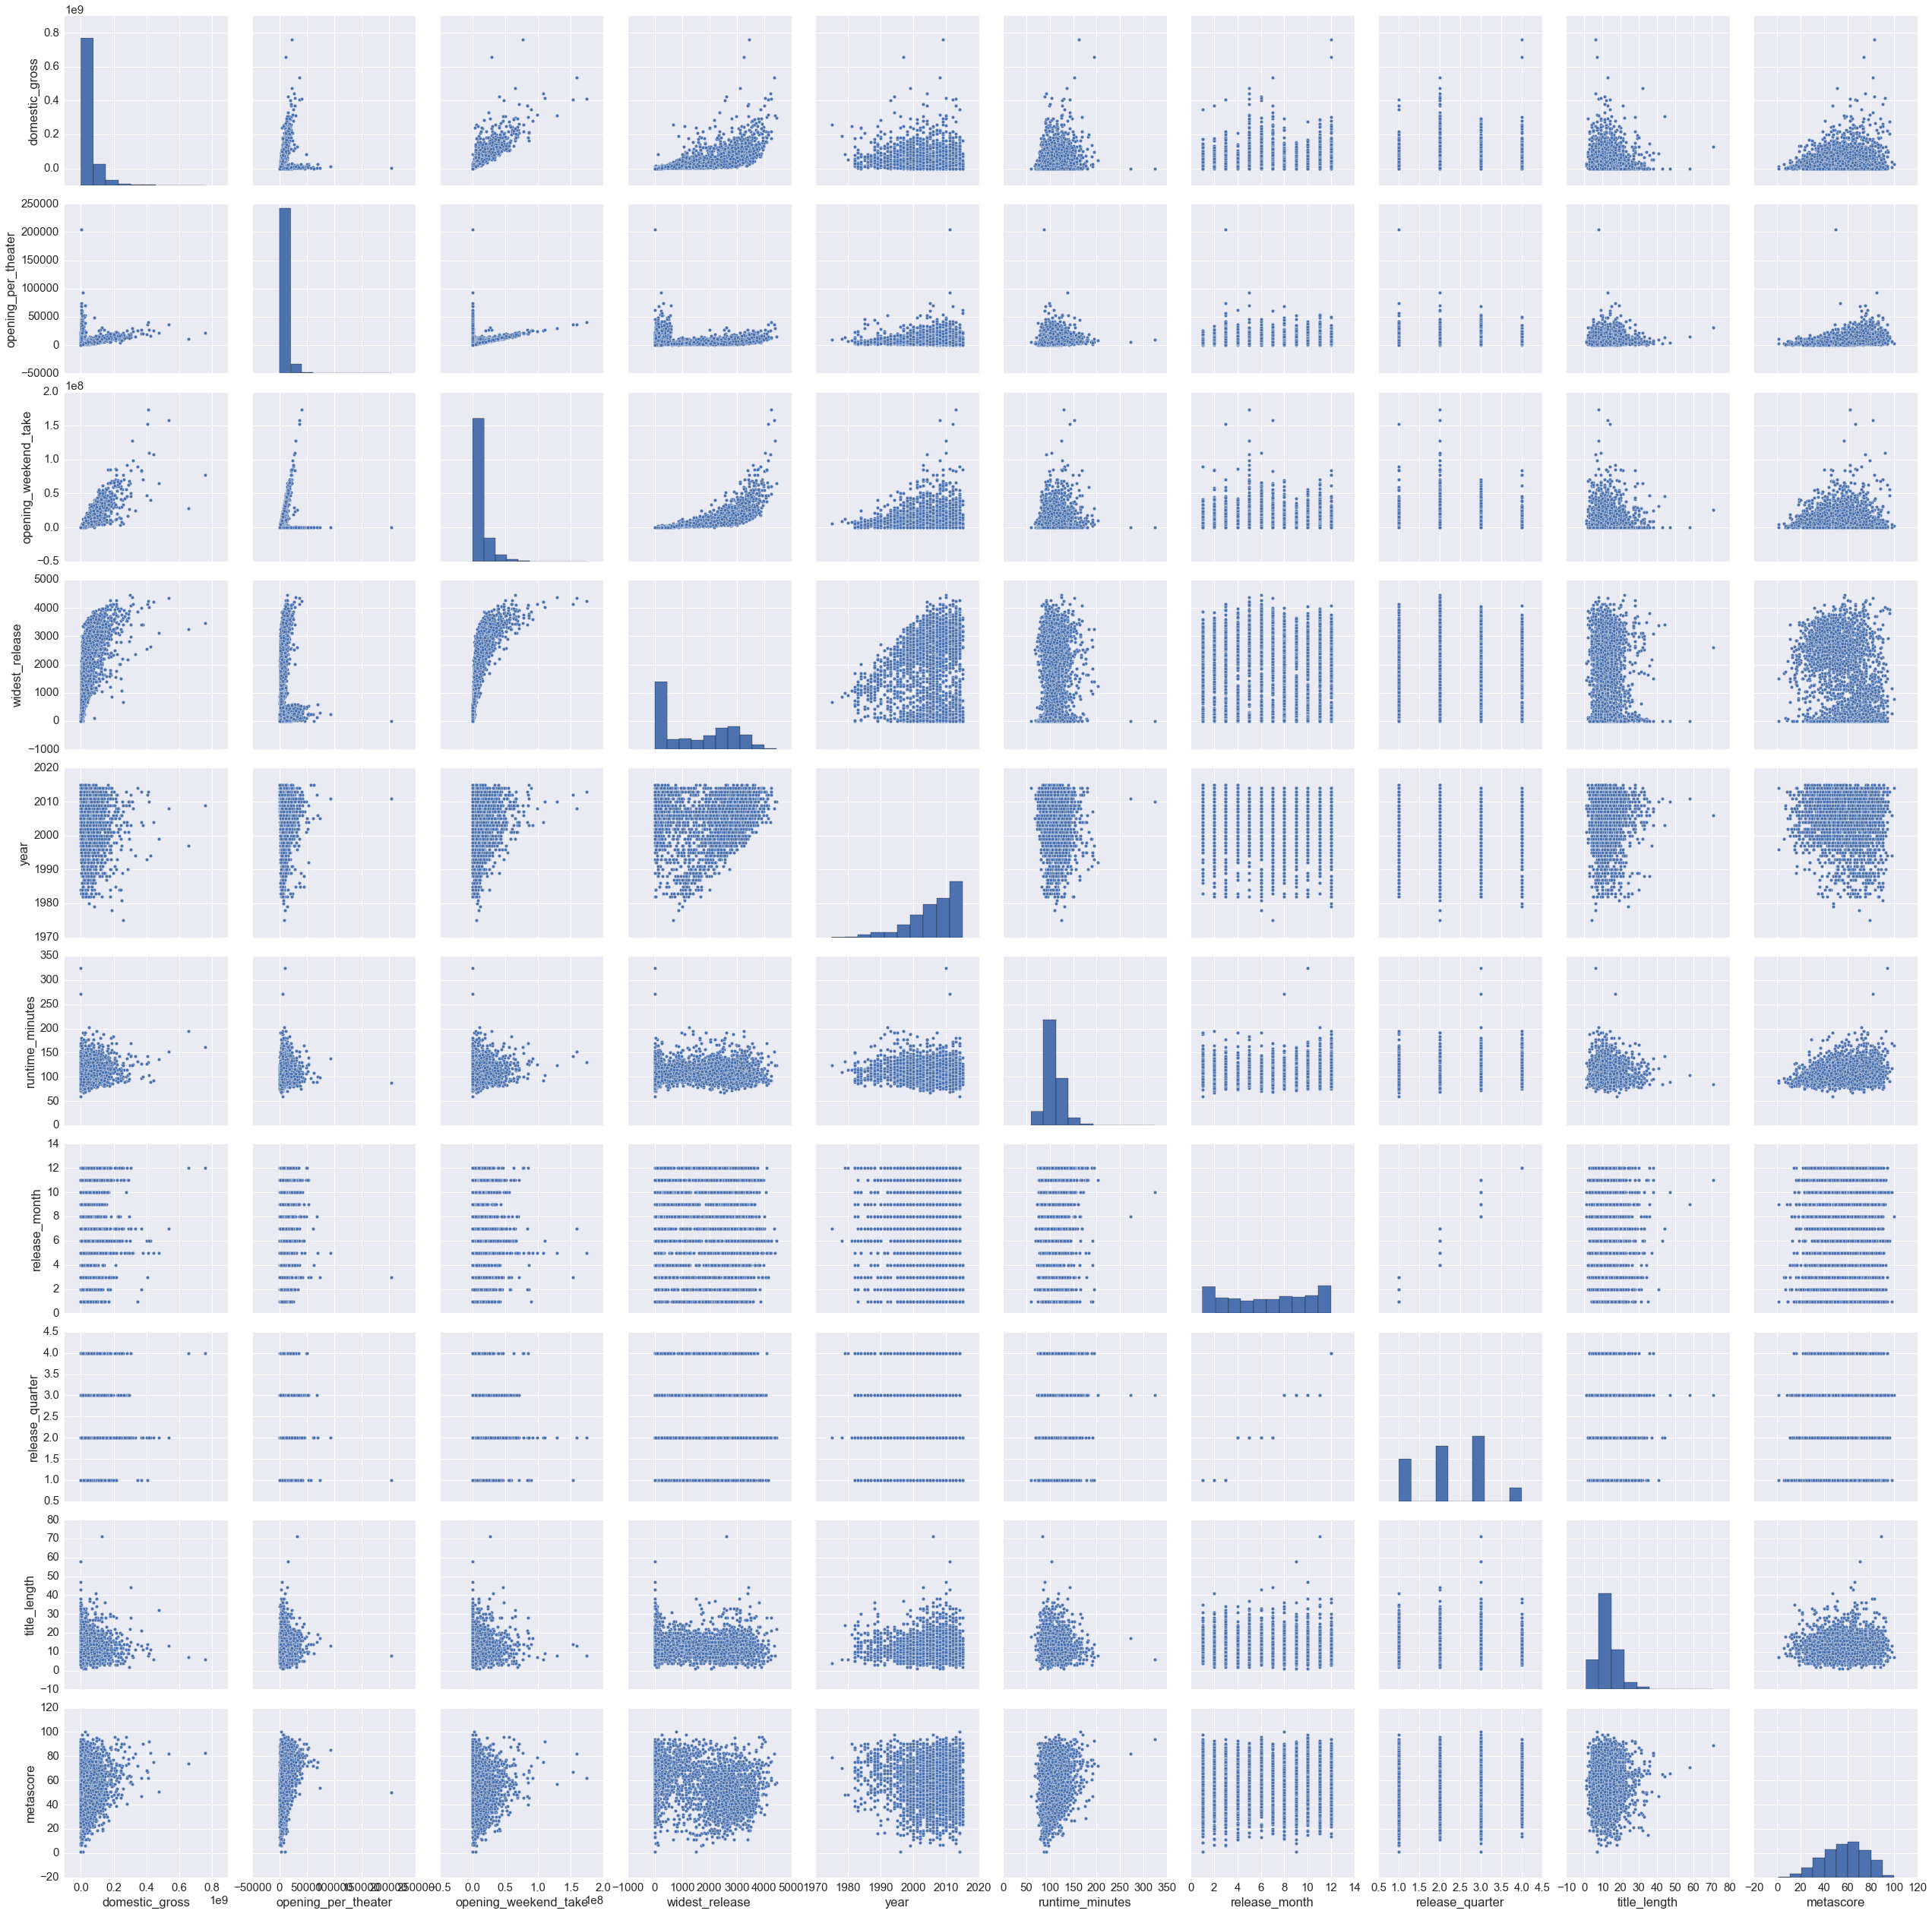

In [44]:
#"production_budget", 
cols = [u'domestic_gross',  u'opening_per_theater', u'opening_weekend_take',
            u'widest_release',  u'year', u'runtime_minutes', 
              u'release_month',      u'release_quarter',
               u'title_length', "metascore"]

sns.pairplot(gross_model_data_real_df[cols], size=3.5)

### Correlation Matrix

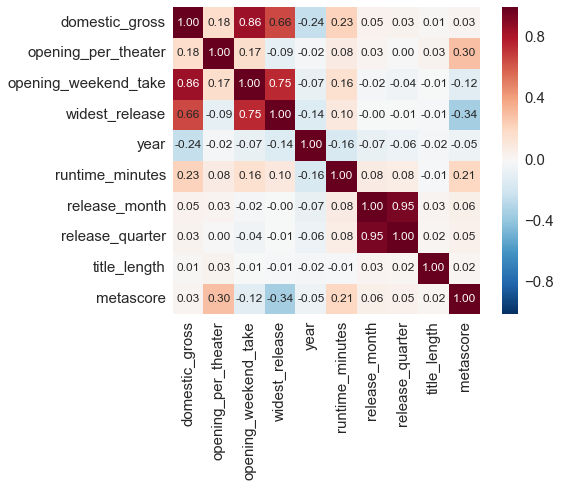

In [45]:
#"production_budget", 
cols = [u'domestic_gross',  u'opening_per_theater', u'opening_weekend_take',
            u'widest_release',  u'year', u'runtime_minutes', 
              u'release_month',      u'release_quarter',
               u'title_length', "metascore"]

import numpy as np
cm = np.corrcoef(gross_model_data_real_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 12},
                yticklabels=cols,
                xticklabels=cols)

## (4) Linear Regression Model Building Predicting Gross (Long Term Model)

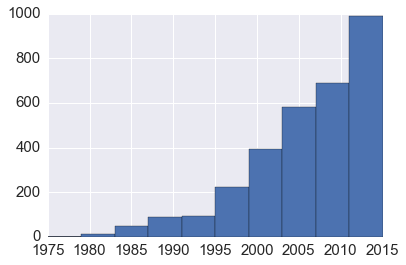

In [101]:
#print gross_model_data_real_df.year.value_counts()
gross_model_data_real_df.year.hist()

In [103]:
print gross_model_data_real_df[gross_model_data_real_df.year >= 2013].shape  
print gross_model_data_real_df[gross_model_data_real_df.year <= 2012].shape
print gross_model_data_real_df.shape

(544, 49)
(2573, 49)
(3117, 49)


In [153]:
import pandas as pd
import os
DataPath = "C:\Work\Training\DSBootCamp\Project\DSBootcamp_ProjectW1"

directorInfoDF = pd.read_csv(os.path.join(DataPath, "director_grade.csv"), sep="|", header=0)
studioInfoDF = pd.read_csv(os.path.join(DataPath, "studio.csv"), sep = ",", header=0)

In [154]:
directorInfoDF.dropna(inplace = True)
print directorInfoDF.head(5)

           director director_open_1M director_num_bucket  \
0      Aaron Blaise            False                   1   
1        Aaron Katz             True                   1   
2   Aaron Schneider             True                   1   
3     Aaron Seltzer            False                 2-4   
4  Abbas Kiarostami             True                   1   

  director_rating_bucket  
0                average  
1                average  
2                average  
3                    bad  
4                   good  


In [155]:
#directorInfoDF["dirFlag"] = np.vectorize(lambda x, y, z: str(str(x) + "|" + str(y) + "|" + str(z)), 
#directorInfoDF["director_open_1M"], directorInfoDF["director_num_bucket"], directorInfoDF["director_rating_bucket"])

#directorInfoDF["dirFlag"] = directorInfoDF[['director_open_1M', 'director_num_bucket', "director_rating_bucket"]].apply(lambda x: '|'.join, axis=1)

In [156]:
directorInfoDF["dirFlag"] = map(lambda x, y, z: str(x) +"|"+str(y)+"|"+str(z), directorInfoDF['director_open_1M'], directorInfoDF['director_num_bucket'], directorInfoDF['director_rating_bucket'])

#print directorInfoDF["dirFlag"]

In [157]:
directorFlagDF = pd.get_dummies(directorInfoDF[["dirFlag"]])
print directorFlagDF.head(5)

   dirFlag_False|1|average  dirFlag_False|1|bad  dirFlag_False|1|good  \
0                      1.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   dirFlag_False|2-4|average  dirFlag_False|2-4|bad  dirFlag_False|2-4|good  \
0                        0.0                    0.0                     0.0   
1                        0.0                    0.0                     0.0   
2                        0.0                    0.0                     0.0   
3                        0.0                    1.0                     0.0   
4                        0.0                    0.0                     0.0   

   dirFlag_False|5+|average  dirFlag_False|5+|bad  dirFlag_False|5+|good  \
0         

In [178]:
directorInfoDF = pd.concat([directorInfoDF, directorFlagDF], axis=1)

In [179]:
directorInfoDF.isnull().sum()

director                     0
director_open_1M             0
director_num_bucket          0
director_rating_bucket       0
dirFlag                      0
dirFlag_False|1|average      0
dirFlag_False|1|bad          0
dirFlag_False|1|good         0
dirFlag_False|2-4|average    0
dirFlag_False|2-4|bad        0
dirFlag_False|2-4|good       0
dirFlag_False|5+|average     0
dirFlag_False|5+|bad         0
dirFlag_False|5+|good        0
dirFlag_True|1|average       0
dirFlag_True|1|bad           0
dirFlag_True|1|good          0
dirFlag_True|2-4|average     0
dirFlag_True|2-4|bad         0
dirFlag_True|2-4|good        0
dirFlag_True|5+|average      0
dtype: int64

In [158]:
studioInfoDF.columns

Index([u'Unnamed: 0', u'studio', u'movie_count', u'metascore_mean',
       u'domestic_gross_median', u'metascore_mean_bucket',
       u'domestic_gross_median_bucket', u'movie_count_bucket'],
      dtype='object')

In [159]:
studioInfoDF = studioInfoDF[["studio", "metascore_mean_bucket", u'domestic_gross_median_bucket', u'movie_count_bucket']]
studioInfoDF.dropna(inplace = True)

In [160]:
print studioInfoDF.head(5)

                                studio metascore_mean_bucket  \
1      "DIA" Productions GmbH & Co. KG                     L   
2                            108 Media                     M   
3  20th Century Fox Home Entertainment                     M   
4                            518 Media                     H   
5                8X Entertainment Inc.                     L   

  domestic_gross_median_bucket movie_count_bucket  
1                            L                  S  
2                            L                  S  
3                            L                  S  
4                            L                  S  
5                            L                  S  


In [161]:
studioInfoDF["solutionFlag"] = map(lambda x, y, z: str(x) +"|"+str(y)+"|"+str(z), studioInfoDF['metascore_mean_bucket'], 
                                   studioInfoDF['domestic_gross_median_bucket'], studioInfoDF['movie_count_bucket'])

In [162]:
studioFlagDF = pd.get_dummies(studioInfoDF[["solutionFlag"]])
print studioFlagDF.head(5)

   solutionFlag_H|H|S  solutionFlag_H|L|B  solutionFlag_H|L|M  \
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   

   solutionFlag_H|L|S  solutionFlag_L|H|S  solutionFlag_L|L|S  \
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 1.0                 0.0                 0.0   
5                 0.0                 0.0                 1.0   

   solutionFlag_M|H|S  solutionFlag_M|L|B  solutionFlag_M|L|M  \
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0  

In [180]:
studioInfoDF = pd.concat([studioInfoDF, studioFlagDF], axis=1)

In [181]:
studioInfoDF.isnull().sum()

studio                          0
metascore_mean_bucket           0
domestic_gross_median_bucket    0
movie_count_bucket              0
solutionFlag                    0
solutionFlag_H|H|S              0
solutionFlag_H|L|B              0
solutionFlag_H|L|M              0
solutionFlag_H|L|S              0
solutionFlag_L|H|S              0
solutionFlag_L|L|S              0
solutionFlag_M|H|S              0
solutionFlag_M|L|B              0
solutionFlag_M|L|M              0
solutionFlag_M|L|S              0
dtype: int64

In [254]:
#"production_budget", 
colNames = [u'domestic_gross',              u'year', u'runtime_minutes', u'Sci-Fi', 'director_y', 'studio',
                      u'Crime',              u'Romance',
                  u'Animation',                u'Music',
                      u'Adult',               u'Comedy',
                        u'War',               u'Horror',
                    u'Western',               u'News',  
                   u'Thriller',            u'Adventure',
                    u'Mystery',                u'Drama',
                     u'Action',          u'Documentary',
                    u'Musical',              u'History',
                     u'Family',              u'Fantasy',
                      u'Sport',            u'Biography',
              u'release_month',      u'release_quarter',
               u'title_length']

gross_model_data_long_df = gross_model_data_df[colNames]

In [255]:
gross_model_data_long_df = gross_model_data_long_df.merge(directorInfoDF, how = 'inner', left_on = ["director_y"], right_on=["director"])

In [256]:
gross_model_data_long_df = gross_model_data_long_df.merge(studioInfoDF, how = 'inner', left_on = ["studio"], right_on=["studio"])

In [257]:
print gross_model_data_long_df.shape
print gross_model_data_long_df.isnull().sum()

(2735, 66)
domestic_gross                  0
year                            0
runtime_minutes                 0
Sci-Fi                          0
director_y                      0
studio                          0
Crime                           0
Romance                         0
Animation                       0
Music                           0
Adult                           0
Comedy                          0
War                             0
Horror                          0
Western                         0
News                            0
Thriller                        0
Adventure                       0
Mystery                         0
Drama                           0
Action                          0
Documentary                     0
Musical                         0
History                         0
Family                          0
                               ..
dirFlag_False|2-4|good          0
dirFlag_False|5+|average        0
dirFlag_False|5+|bad            0
dir

In [258]:
print gross_model_data_long_df.columns

Index([              u'domestic_gross',                         u'year',
                    u'runtime_minutes',                       u'Sci-Fi',
                         u'director_y',                       u'studio',
                              u'Crime',                      u'Romance',
                          u'Animation',                        u'Music',
                              u'Adult',                       u'Comedy',
                                u'War',                       u'Horror',
                            u'Western',                         u'News',
                           u'Thriller',                    u'Adventure',
                            u'Mystery',                        u'Drama',
                             u'Action',                  u'Documentary',
                            u'Musical',                      u'History',
                             u'Family',                      u'Fantasy',
                              u'Sport',            

In [259]:
colList = [u'domestic_gross',                         u'year',
                    u'runtime_minutes',                       u'Sci-Fi',
                              u'Crime',                      u'Romance',
                          u'Animation',                        u'Music',
                              u'Adult',                       u'Comedy',
                                u'War',                       u'Horror',
                            u'Western',                         u'News',
                           u'Thriller',                    u'Adventure',
                            u'Mystery',                        u'Drama',
                             u'Action',                  u'Documentary',
                            u'Musical',                      u'History',
                             u'Family',                      u'Fantasy',
                              u'Sport',                    u'Biography',
                      u'title_length',                     
            u'dirFlag_False|1|average',          u'dirFlag_False|1|bad',
               u'dirFlag_False|1|good',    u'dirFlag_False|2-4|average',
              u'dirFlag_False|2-4|bad',       u'dirFlag_False|2-4|good',
           u'dirFlag_False|5+|average',         u'dirFlag_False|5+|bad',
              u'dirFlag_False|5+|good',       u'dirFlag_True|1|average',
                 u'dirFlag_True|1|bad',          u'dirFlag_True|1|good',
           u'dirFlag_True|2-4|average',         u'dirFlag_True|2-4|bad',
              u'dirFlag_True|2-4|good',      u'dirFlag_True|5+|average',
                 u'solutionFlag_H|H|S',           u'solutionFlag_H|L|B',
                 u'solutionFlag_H|L|M',           u'solutionFlag_H|L|S',
                 u'solutionFlag_L|H|S',           u'solutionFlag_L|L|S',
                 u'solutionFlag_M|H|S',           u'solutionFlag_M|L|B',
                 u'solutionFlag_M|L|M',           u'solutionFlag_M|L|S',
             u'release_month',              u'release_quarter']

gross_model_data_long_df = gross_model_data_long_df[colList]

In [260]:
gross_model_data_long_df.shape

(2735, 55)

### Building Linear Model

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


#ignoreList = ["title_length", "metascore"]
ignoreList = ["metascore"]
ignoreList2 = [u'Sci-Fi', 'solutionFlag_H|H|S', 'dirFlag_False|1|average']  #using Sci-Fi as default
ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_long_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and ("solutionFlag_" not in col) and ("dirFlag_" not in col)] 
predictorNameList = [col for col in gross_model_data_long_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2)] 


X_train = gross_model_data_long_df[gross_model_data_long_df.year <= 2012][predictorNameList].values
X_test = gross_model_data_long_df[gross_model_data_long_df.year >= 2013][predictorNameList].values
y_train = gross_model_data_long_df[gross_model_data_long_df.year <= 2012]["domestic_gross"].values
y_test = gross_model_data_long_df[gross_model_data_long_df.year >= 2013]["domestic_gross"].values

print X_train.shape
print X_test.shape

(2502L, 51L)
(233L, 51L)


In [262]:
print predictorNameList

[u'year', u'runtime_minutes', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography', 'title_length', 'dirFlag_False|1|bad', 'dirFlag_False|1|good', 'dirFlag_False|2-4|average', 'dirFlag_False|2-4|bad', 'dirFlag_False|2-4|good', 'dirFlag_False|5+|average', 'dirFlag_False|5+|bad', 'dirFlag_False|5+|good', 'dirFlag_True|1|average', 'dirFlag_True|1|bad', 'dirFlag_True|1|good', 'dirFlag_True|2-4|average', 'dirFlag_True|2-4|bad', 'dirFlag_True|2-4|good', 'dirFlag_True|5+|average', 'solutionFlag_H|L|B', 'solutionFlag_H|L|M', 'solutionFlag_H|L|S', 'solutionFlag_L|H|S', 'solutionFlag_L|L|S', 'solutionFlag_M|H|S', 'solutionFlag_M|L|B', 'solutionFlag_M|L|M', 'solutionFlag_M|L|S', 'release_month', 'release_quarter']


In [263]:
lmodel_gross_long = RandomForestRegressor(n_estimators=100, max_depth=10)

#lmodel_gross_long = LinearRegression()
lmodel_gross_long.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [264]:
y_train_pred = lmodel_gross_long.predict(X_train)
y_test_pred = lmodel_gross_long.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 985189463759814.875000
R2 (Train) = 0.449714
MSE (Test) = 2232673400391314.750000
R2 (Test) = -0.315015


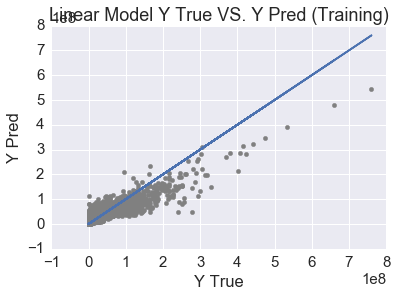

In [265]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Linear Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

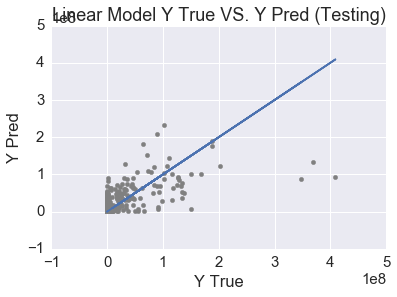

In [266]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Linear Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

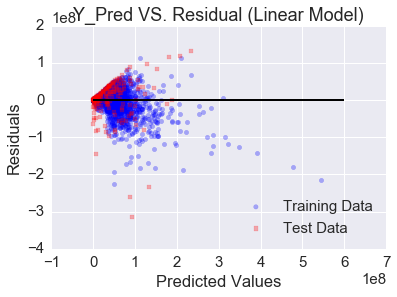

In [267]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (RF Model)")

## (5) Linear Regression Model Building Predicting Gross (Short Term Model)

Predicting Domestic gross based on openning weekend sale and what => movie info and when => month that movie is released and who => director

### Building Linear Model

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [110]:
ignoreList = ["title_length", "metascore"]
ignoreList2 = [u'Sci-Fi']  #using Sci-Fi as default
#ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
#               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
#               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_real_lm_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and "month_" not in col and "quarter_" not in col and "rating_" not in col] 
y = gross_model_data_real_lm_df["domestic_gross"].values
X = gross_model_data_real_lm_df[predictorNameList].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print X_train.shape
print X_test.shape

(2181L, 27L)
(936L, 27L)


In [111]:
print predictorNameList

[u'opening_per_theater', u'opening_weekend_take', u'widest_release', u'year', u'runtime_minutes', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']


In [112]:
lmodel_gross = LinearRegression()
lmodel_gross.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
y_train_pred = lmodel_gross.predict(X_train)
y_test_pred = lmodel_gross.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 846447379659005.125000
R2 (Train) = 0.700538
MSE (Test) = 513273139666739.000000
R2 (Test) = 0.784788


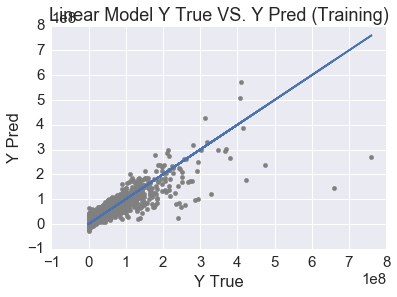

In [114]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Linear Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

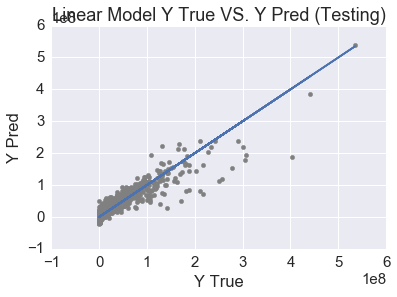

In [115]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Linear Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

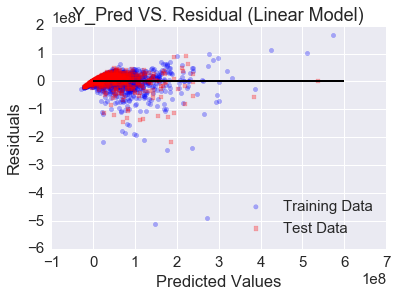

In [116]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (Linear Model)")

In [117]:
import pprint
print "(Predictor Names, Coeff) := "
pprint.pprint(zip(predictorNameList, lmodel_gross.coef_))

print "Model Intercept is %f" % (lmodel_gross.intercept_)

(Predictor Names, Coeff) := 
[(u'opening_per_theater', 137.00952310307702),
 (u'opening_weekend_take', 3.3055290538636535),
 (u'widest_release', 924.37976327179956),
 (u'year', -1476375.5541293311),
 (u'runtime_minutes', 308229.07821569691),
 (u'Crime', -1890968.6481998188),
 (u'Romance', -234942.59486631487),
 (u'Animation', 9721666.8008790817),
 (u'Music', -4622309.3038835423),
 (u'Adult', -122031611.94977216),
 (u'Comedy', 1530248.9276232419),
 (u'War', -2790607.1616224307),
 (u'Horror', -5560682.1066826098),
 (u'Western', -1189733.6101134787),
 (u'News', 2224581.0660736552),
 (u'Thriller', -5434070.9854502734),
 (u'Adventure', -1500803.7242351666),
 (u'Mystery', -2575142.6796280439),
 (u'Drama', -285729.35679932253),
 (u'Action', -5925985.1204738868),
 (u'Documentary', 1364612.0382871709),
 (u'Musical', 2008579.346894417),
 (u'History', 169050.76860022303),
 (u'Family', 7492049.9738551779),
 (u'Fantasy', -3011059.2545234789),
 (u'Sport', -7535978.1131905634),
 (u'Biography', -12610

### Building Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [56]:
ignoreList = ["title_length", "metascore", "release_month", "release_quarter"]
ignoreList2 = []
#ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
#               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
#               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_real_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and "month_" not in col and "quarter_" not in col and "rating_" not in col]
y = gross_model_data_real_df["domestic_gross"].values
X = gross_model_data_real_df[predictorNameList].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print X_train.shape
print X_test.shape

(2181L, 28L)
(936L, 28L)


In [57]:
print predictorNameList

[u'opening_per_theater', u'opening_weekend_take', u'widest_release', u'year', u'runtime_minutes', u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']


In [58]:
rfmodel_gross = RandomForestRegressor(n_estimators=100, max_depth=10)
rfmodel_gross.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [59]:
y_train_pred = rfmodel_gross.predict(X_train)
y_test_pred = rfmodel_gross.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 131619523230384.484375
R2 (Train) = 0.959212
MSE (Test) = 410180278229122.312500
R2 (Test) = 0.832268


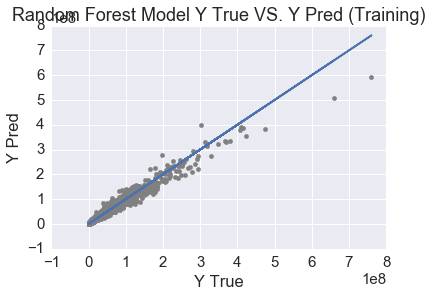

In [60]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Random Forest Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

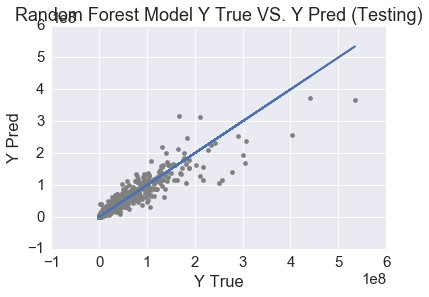

In [61]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Random Forest Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

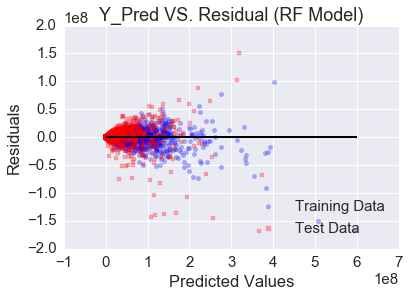

In [62]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (RF Model)")

### Building GBM Model

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [67]:
ignoreList = ["title_length", "metascore", "release_month", "release_quarter"]
ignoreList2 = []
#ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
#               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
#               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_real_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and "month_" not in col and "quarter_" not in col and "rating_" not in col]
y = gross_model_data_real_df["domestic_gross"].values
X = gross_model_data_real_df[predictorNameList].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print X_train.shape
print X_test.shape

(2181L, 28L)
(936L, 28L)


In [68]:
print predictorNameList

[u'opening_per_theater', u'opening_weekend_take', u'widest_release', u'year', u'runtime_minutes', u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']


In [80]:
gbm_model_gross = GradientBoostingRegressor(n_estimators=500, max_depth=3)
gbm_model_gross.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [81]:
y_train_pred = gbm_model_gross.predict(X_train)
y_test_pred = gbm_model_gross.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 55564746327515.007812
R2 (Train) = 0.984099
MSE (Test) = 508825476624349.500000
R2 (Test) = 0.810648


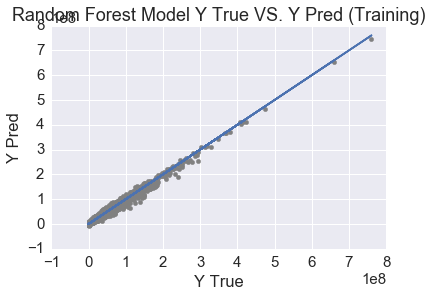

In [82]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Random Forest Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

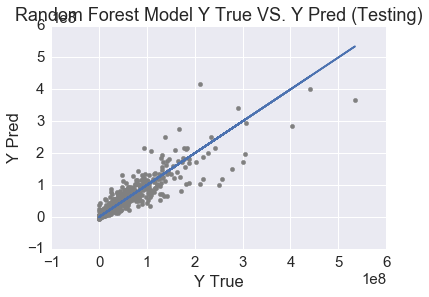

In [83]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Random Forest Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

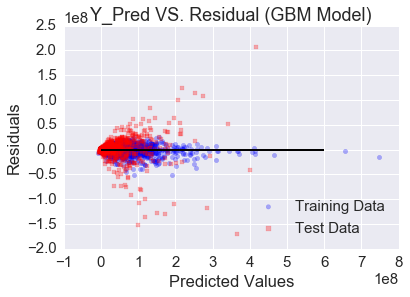

In [84]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (GBM Model)")